### Scaler
- 값의 분포를 조절
- 신경망, SVM은 데이터 스케일에 민감
- Tree 는 스케일 무관

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x = np.random.randint(5, 10, (10, 2))
x = x.astype('float64')
x.dtype, x.shape

(dtype('float64'), (10, 2))

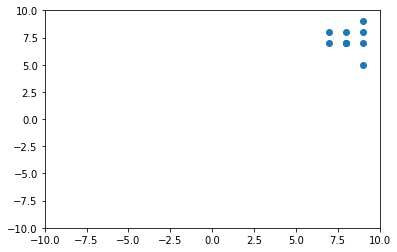

In [3]:
#plt.figure(figsize=(8, 8))
plt.scatter(x[:, 0], x[:, 1])
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

In [4]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer

In [5]:
s0 = MinMaxScaler().fit(x) # 최소값, 최대값 계산해서 기억해 둔다.
x0 = s0.transform(x) # 기업해둔 최소값, 최대값으로 정규화 한다.

In [6]:
s1 = StandardScaler().fit(x) # 평균과 표준편차를 계산해 둔다.
x1 = s1.transform(x)

In [7]:
s2 = RobustScaler().fit(x) # 평균과 표준편차를 계산해 둔다.
x2 = s2.transform(x)

In [8]:
s3 = Normalizer().fit(x) # 평균과 표준편차를 계산해 둔다.
x3 = s3.transform(x)

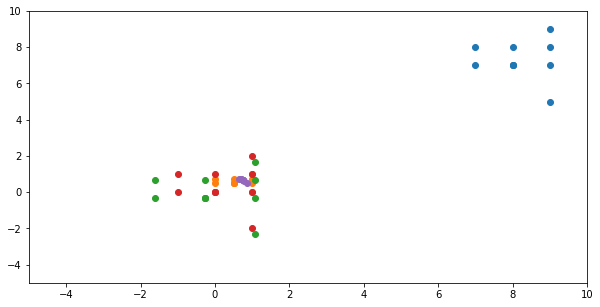

In [9]:
plt.figure(figsize=(10, 5))
plt.scatter(x[:, 0], x[:, 1])
plt.scatter(x0[:, 0], x0[:, 1])
plt.scatter(x1[:, 0], x1[:, 1])
plt.scatter(x2[:, 0], x2[:, 1])
plt.scatter(x3[:, 0], x3[:, 1])
plt.xlim(-5, 10)
plt.ylim(-5, 10)
plt.show()

### 역변환이 된다

In [11]:
s0.inverse_transform(x0) == x

array([[ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True]])

In [19]:
from sklearn.datasets import load_breast_cancer

In [20]:
# 유방암 데이터를 2차원으로 주성분을 뽑아서 그래프로 표현합니다.
cancer = load_breast_cancer()
cancer.data.shape

(569, 30)

In [22]:
from sklearn.decomposition import PCA # 주성분을 뽑아낸다.

In [23]:
scaler = StandardScaler().fit(cancer.data) # 30개 열의 평균과 표준편차를 계산해 둔다.
x = scaler.transform(cancer.data)

In [28]:
np.max(cancer.data), np.max(x)

(4254.0, 12.072680399588076)

In [29]:
pca = PCA(2).fit(x) # 30개 열을 2개로 2 줄이기 위해 fitting 한다.
x_pca = pca.transform(x)
x_pca.shape

(569, 2)

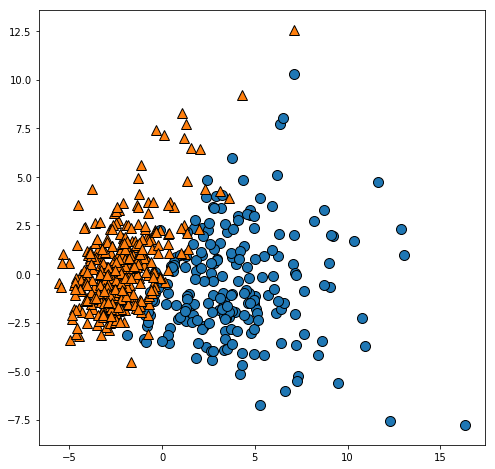

In [34]:
import mglearn
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(x_pca[:, 0], x_pca[:, 1], cancer.target)
plt.show()